## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [1]:
import pandas as pd
#
var_list = ['year','income16', 'conpress','conmedic','consci','confed','conjudge','conlegis','conarmy'] # List of variables you want to save
output_filename = 'cleaned_selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#



for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    df = df[df['year'] == 2022]   #get data from recent year of 2022
    df = df.dropna(subset=['income16','conpress','conmedic','consci','confed','conjudge','conlegis','conarmy'])#getting the specific columns needed
    
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
Empty DataFrame
Columns: [year, id, wrkstat, hrs1, hrs2, evwork, occ, prestige, wrkslf, wrkgovt, commute, industry, occ80, prestg80, indus80, indus07, occonet, found, occ10, occindv, occstatus, occtag, prestg10, prestg105plus, indus10, indstatus, indtag, marital, martype, agewed, divorce, widowed, spwrksta, sphrs1, sphrs2, spevwork, cowrksta, cowrkslf, coevwork, cohrs1, cohrs2, spocc, sppres, spwrkslf, spind, spocc80, sppres80, spind80, spocc10, spoccindv, spoccstatus, spocctag, sppres10, sppres105plus, spind10, spindstatus, spindtag, coocc10, coind10, paocc16, papres16, pawrkslf, paind16, paocc80, papres80, paind80, paocc10, paoccindv, paoccstatus, paocctag, papres10, papres105plus, paind10, paindstatus, paindtag, maocc80, mapres80, mawrkslf, maind80, maocc10, maoccindv, maoccstatus, maocctag, mapres10, mapres105plus, maind10, maindstatus, maindtag, sibs, childs, age, agekdbrn, educ, paeduc, maeduc, speduc, coeduc, cod

In [2]:
unique_values = df['income16'].astype(str).unique()
print(unique_values)

['$90,000 to $109,999' '$40,000 to $49,999' '$25,000 to $29,999'
 '$50,000 to $59,999' '$170,000 or over' '$30,000 to $34,999'
 '$130,000 to $149,999' '$1,000 to $2,999' '$15,000 to $17,499'
 '$10,000 to $12,499' '$35,000 to $39,999' '$110,000 to $129,999'
 '$75,000 to $89,999' '$150,000 to $169,999' '$5,000 to $5,999'
 'under $1,000' '$17,500 to $19,999' '$8,000 to $9,999'
 '$60,000 to $74,999' '$6,000 to $6,999' '$20,000 to $22,499'
 '$22,500 to $24,999' '$12,500 to $14,999' '$7,000 to $7,999'
 '$4,000 to $4,999' '$3,000 to $3,999']


In [3]:
unique_values = df['conpress'].astype(str).unique()
print(unique_values)


['only some' 'hardly any' 'a great deal']


In [4]:
unique_values = df['conmedic'].astype(str).unique()
print(unique_values)


['a great deal' 'only some' 'hardly any']


In [5]:
unique_values = df['consci'].astype(str).unique()
print(unique_values)


['a great deal' 'only some' 'hardly any']


In [6]:
unique_values = df['confed'].astype(str).unique()
print(unique_values)


['a great deal' 'hardly any' 'only some']


In [7]:
unique_values = df['conlegis'].astype(str).unique()
print(unique_values)


['hardly any' 'only some' 'a great deal']


In [8]:
unique_values = df['conarmy'].astype(str).unique()
print(unique_values)


['only some' 'a great deal' 'hardly any']


In [11]:
df = pd.read_csv("cleaned_selected_gss_data.csv")   #read the somewhat cleaned csv file

df['income16'] = df['income16'].map({'under $1,000': 1, '$1,000 to $2,999': 2,'$3,000 to $3,999': 3,'$4,000 to $4,999': 4,'$5,000 to $5,999': #Map the string values to numerical values for clarity in analysis
     5,'$6,000 to $6,999': 6,'$7,000 to $7,999': 7,'$8,000 to $9,999': 8,'$10,000 to $12,499': 9,'$12,500 to $14,999': 10,'$15,000 to $17,499': 11
     ,'$17,500 to $19,999': 12,'$20,000 to $22,499': 13,'$22,500 to $24,999': 14,'$25,000 to $29,999': 15,'$30,000 to $34,999': 16,'$35,000 to $39,999': 17
     ,'$40,000 to $49,999': 18,'$50,000 to $59,999': 19,'$60,000 to $74,999': 20,'$75,000 to $89,999': 21,'$90,000 to $109,999': 22,'$110,000 to $129,999': 23
     ,'$130,000 to $149,999': 24,'$150,000 to $169,999': 25,'$170,000 or over': 26})

df['conpress'] = df['conpress'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['conmedic'] = df['conmedic'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['consci'] = df['consci'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['confed'] = df['confed'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['conjudge'] = df['conjudge'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['conlegis'] = df['conlegis'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df['conarmy'] = df['conarmy'].map({'only some': 2, 'hardly any': 3,'a great deal' : 1})
df.to_csv('final_cleaned_data.csv', index=False) #write the cleaned dataframe to the csv file


Index(['year', 'income16', 'conpress', 'conmedic', 'consci', 'confed',
       'conjudge', 'conlegis', 'conarmy'],
      dtype='object')


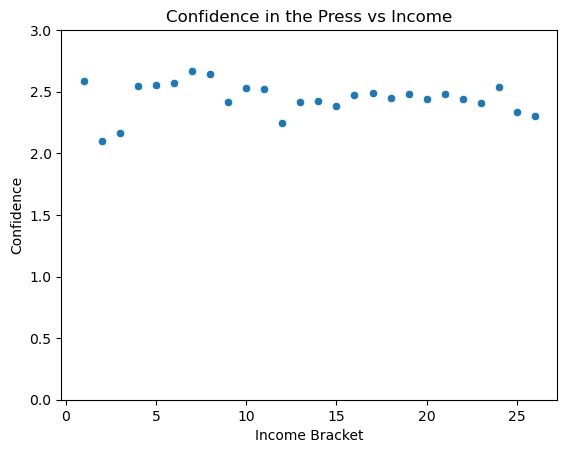

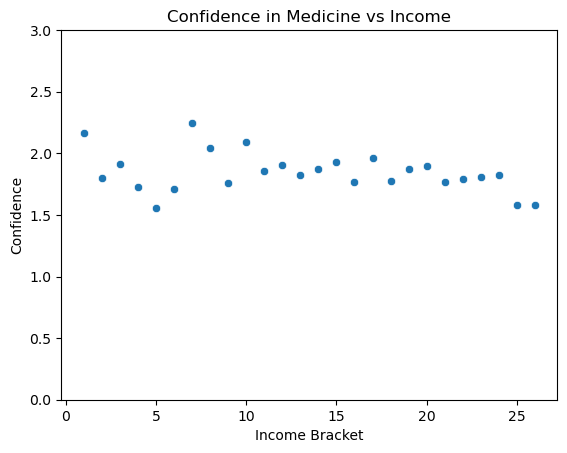

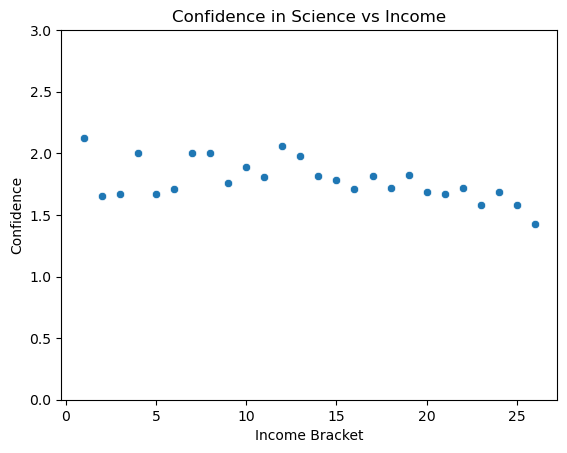

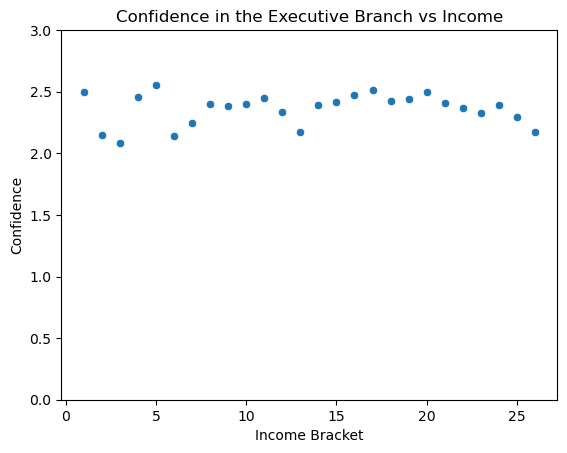

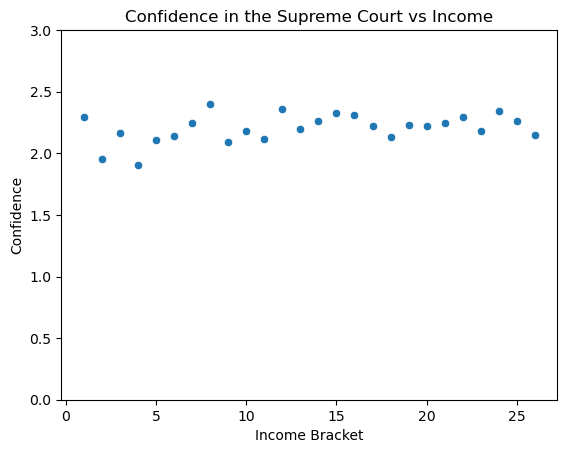

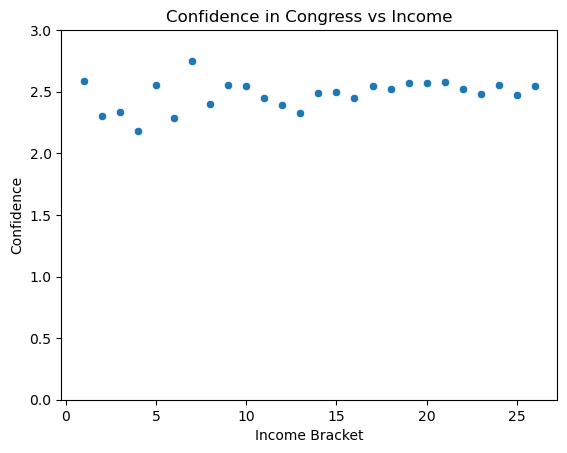

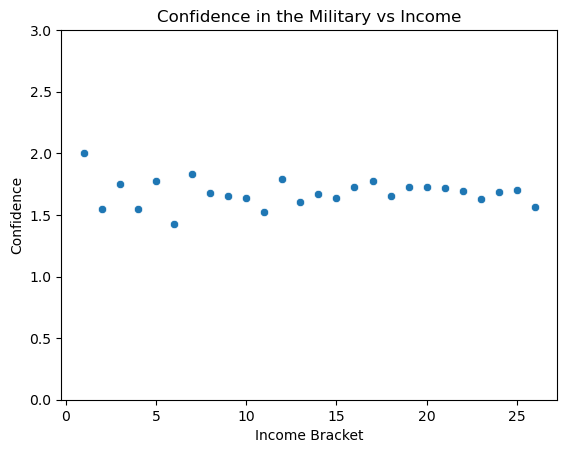

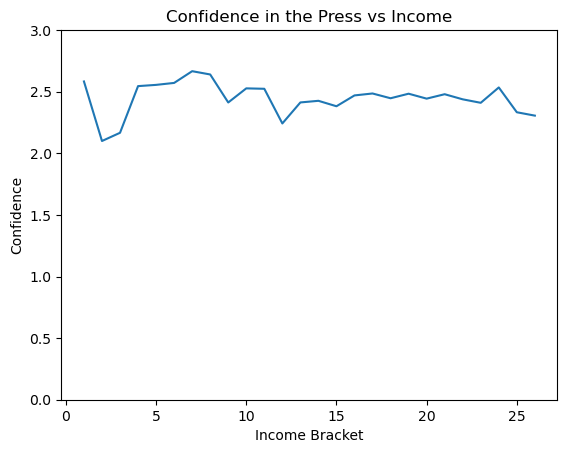

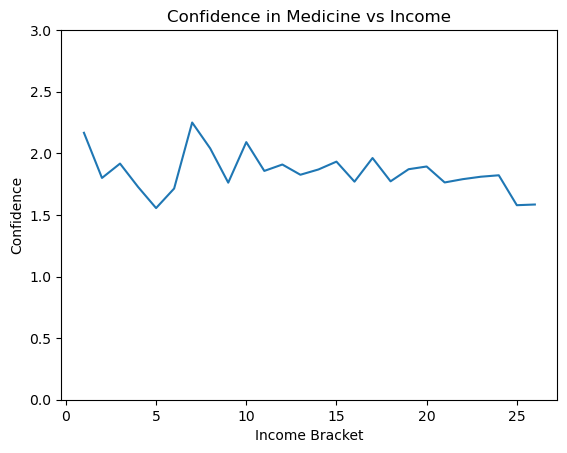

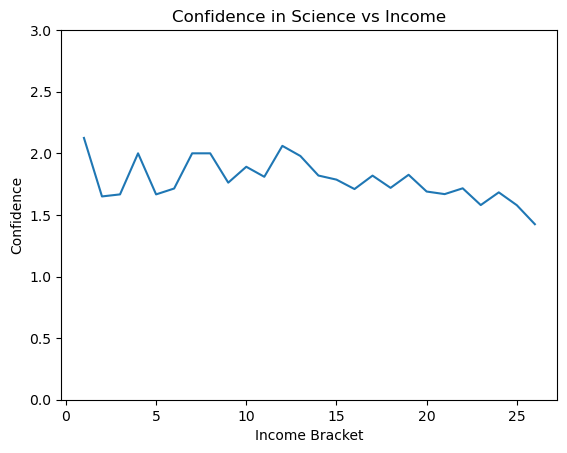

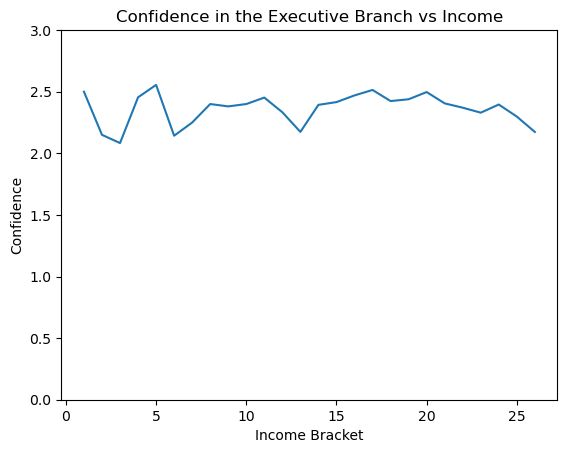

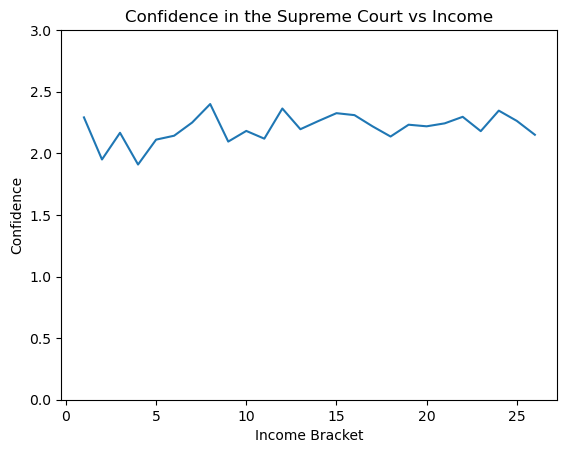

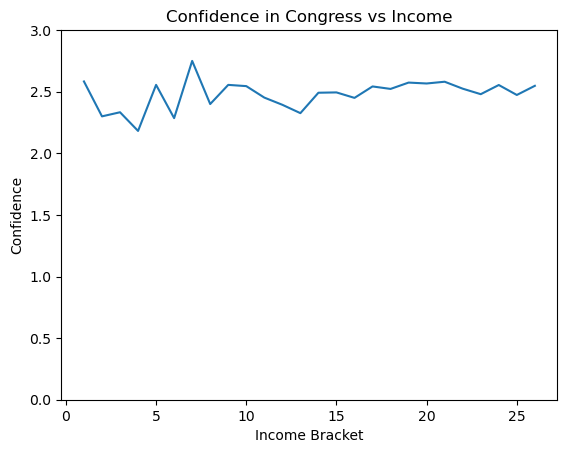

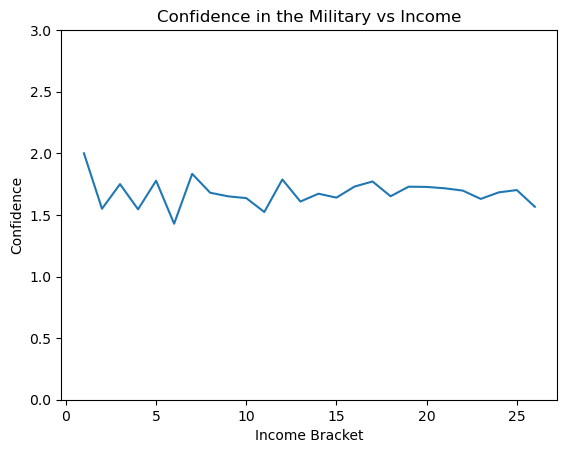

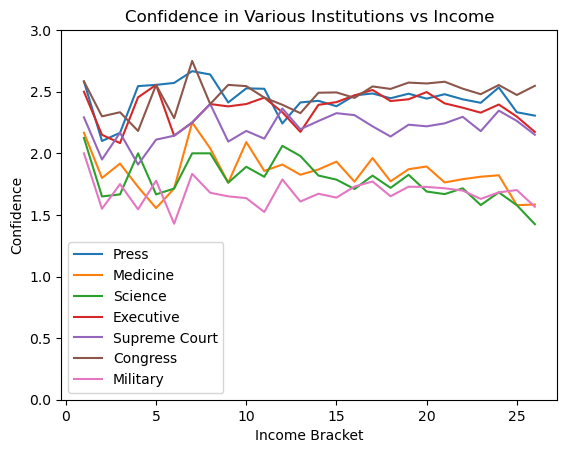

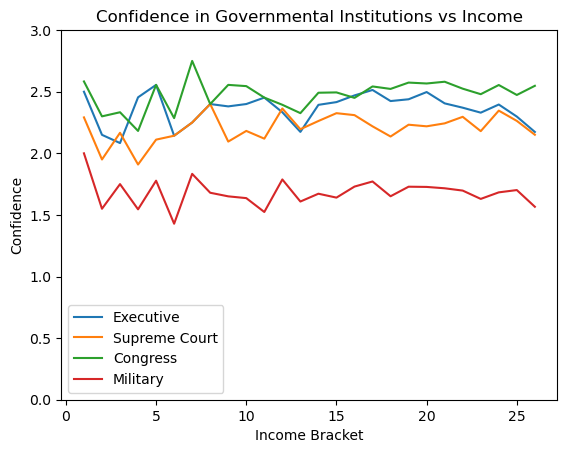

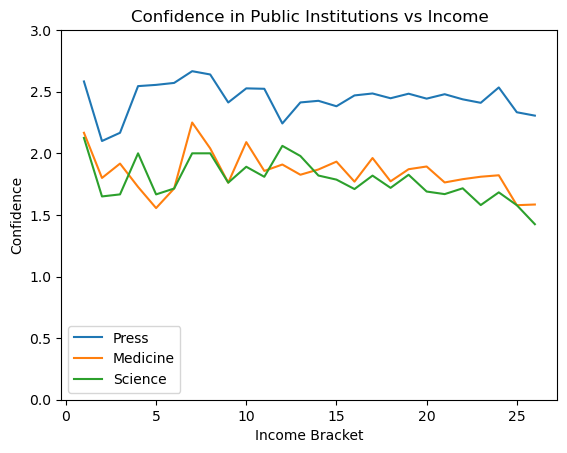

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('final_cleaned_data.csv')
print(df.columns)
df = df.drop(columns=['year'])

conpress_grp_avg = df.groupby('income16')['conpress'].mean()
conmedic_grp_avg = df.groupby('income16')['conmedic'].mean()
consci_grp_avg = df.groupby('income16')['consci'].mean()
confed_grp_avg = df.groupby('income16')['confed'].mean()
conjudge_grp_avg = df.groupby('income16')['conjudge'].mean()
conlegis_grp_avg = df.groupby('income16')['conlegis'].mean()
conarmy_grp_avg = df.groupby('income16')['conarmy'].mean()




#Individual Scatter Plots
def graphScatter():
    #Grouped AVG Scatter Plots
    #Conpress
    plot, axes = plt.subplots()
    sns.scatterplot(conpress_grp_avg)
    plt.title("Confidence in the Press vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conmedic
    plot, axes = plt.subplots()
    sns.scatterplot(conmedic_grp_avg)
    plt.title("Confidence in Medicine vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Consci
    plot, axes = plt.subplots()
    sns.scatterplot(consci_grp_avg)
    plt.title("Confidence in Science vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Confed
    plot, axes = plt.subplots()
    sns.scatterplot(confed_grp_avg)
    plt.title("Confidence in the Executive Branch vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conjudge
    plot, axes = plt.subplots()
    sns.scatterplot(conjudge_grp_avg)
    plt.title("Confidence in the Supreme Court vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conlegis
    plot, axes = plt.subplots()
    sns.scatterplot(conlegis_grp_avg)
    plt.title("Confidence in Congress vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conarmy
    plot, axes = plt.subplots()
    sns.scatterplot(conarmy_grp_avg)
    plt.title("Confidence in the Military vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

def graphLine():
    #Grouped AVG Line Plots
    #Conpress
    plot, axes = plt.subplots()
    sns.lineplot(conpress_grp_avg)
    plt.title("Confidence in the Press vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conmedic
    plot, axes = plt.subplots()
    sns.lineplot(conmedic_grp_avg)
    plt.title("Confidence in Medicine vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Consci
    plot, axes = plt.subplots()
    sns.lineplot(consci_grp_avg)
    plt.title("Confidence in Science vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Confed
    plot, axes = plt.subplots()
    sns.lineplot(confed_grp_avg)
    plt.title("Confidence in the Executive Branch vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conjudge
    plot, axes = plt.subplots()
    sns.lineplot(conjudge_grp_avg)
    plt.title("Confidence in the Supreme Court vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conlegis
    plot, axes = plt.subplots()
    sns.lineplot(conlegis_grp_avg)
    plt.title("Confidence in Congress vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Conarmy
    plot, axes = plt.subplots()
    sns.lineplot(conarmy_grp_avg)
    plt.title("Confidence in the Military vs Income")
    axes.set_ylim(0, 3)
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()


#Grouped Line Graph Plots
def graphLineGRP():
    #Grouped AVG Line Plot, Overlayed, All Con
    plot, axes = plt.subplots()
    sns.lineplot(conpress_grp_avg,label="Press")
    sns.lineplot(conmedic_grp_avg,label="Medicine")
    sns.lineplot(consci_grp_avg,label="Science")
    sns.lineplot(confed_grp_avg,label="Executive")
    sns.lineplot(conjudge_grp_avg,label="Supreme Court")
    sns.lineplot(conlegis_grp_avg,label="Congress")
    sns.lineplot(conarmy_grp_avg,label="Military")
    axes.set_ylim(0, 3)
    plt.title("Confidence in Various Institutions vs Income")
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Grouped AVG Line Plot, Overlayed, Government Institutions
    plot, axes = plt.subplots()
    sns.lineplot(confed_grp_avg,label="Executive")
    sns.lineplot(conjudge_grp_avg,label="Supreme Court")
    sns.lineplot(conlegis_grp_avg,label="Congress")
    sns.lineplot(conarmy_grp_avg, label="Military")
    axes.set_ylim(0, 3)
    plt.title("Confidence in Governmental Institutions vs Income")
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

    #Grouped AVG Line Plot, Overlayed, Public Insitutions
    plot, axes = plt.subplots()
    sns.lineplot(conpress_grp_avg, label="Press")
    sns.lineplot(conmedic_grp_avg, label="Medicine")
    sns.lineplot(consci_grp_avg, label="Science")
    axes.set_ylim(0, 3)
    plt.title("Confidence in Public Institutions vs Income")
    plt.xlabel("Income Bracket")
    plt.ylabel("Confidence")
    plt.show()

graphScatter()
graphLine()
graphLineGRP()